Réalisé par:


*  Karim Ellouze
*   Selma Guedidi
*  Ahmed Aziz Boussaid


**Classification binaire**

In [ ]:
from sklearn.datasets import make_circles

# Créer le dataset avec make_circles()
X, y = make_circles(n_samples=1000, noise=0.03)

# Afficher les dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)


Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)


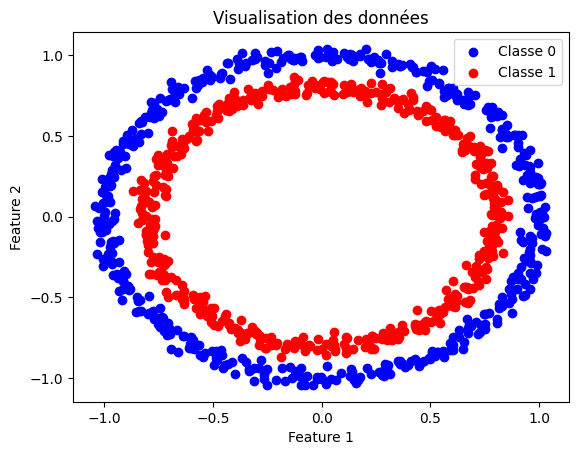

In [ ]:
import matplotlib.pyplot as plt

# Séparer les données en deux classes
class_0 = X[y == 0]
class_1 = X[y == 1]

# Tracer les points pour chaque classe
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Classe 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Classe 1')

plt.title('Visualisation des données')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de l'ensemble d'apprentissage (X_train) :", X_train.shape)
print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)


Dimensions de l'ensemble d'apprentissage (X_train) : (800, 2)
Dimensions de l'ensemble de test (X_test) : (200, 2)


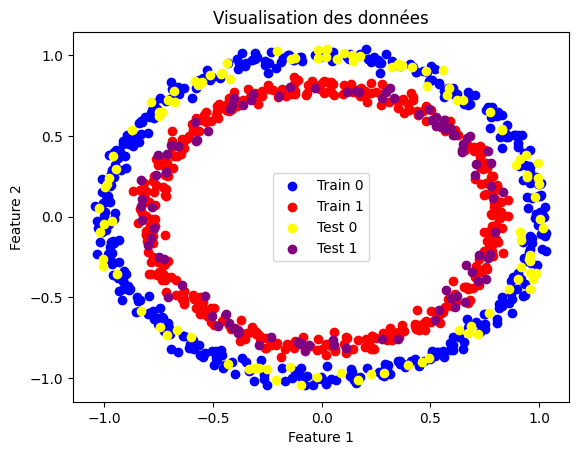

In [ ]:
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]

class_2 = X_test[y_test == 0]
class_3 = X_test[y_test == 1]

# Tracer les points pour chaque classe
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Train 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Train 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='yellow', label='Test 0')
plt.scatter(class_3[:, 0], class_3[:, 1], color='purple', label='Test 1')
plt.title('Visualisation des données')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Définition du modèle FCNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Créer un modèle Sequential
model = Sequential()

# Ajouter une couche entièrement connectée avec 100 neurones cachés
model.add(Dense(1000, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Afficher un résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 125)               31375     
                                                                 
 dense_4 (Dense)             (None, 75)                9450      
                                                                 
 dense_5 (Dense)             (None, 1)                 76        
                                                                 
Total params: 669651 (2.55 MB)
Trainable params: 669651 

In [ ]:

from keras.optimizers import SGD

# Compiler le modèle avec la fonction de perte et l'optimiseur spécifiés
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])


In [ ]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Afficher la progression du modèle toutes les 10 époques
for i in range(0, 100, 10):
    loss_train, acc_train = model.evaluate(X_train, y_train, verbose=0)
    loss_test, acc_test = model.evaluate(X_test, y_test, verbose=0)
    print(f"Epoch {i+1}:")
    print(f"  Entraînement - Loss: {loss_train:.4f}, Accuracy: {acc_train:.4f}")
    print(f"  Test - Loss: {loss_test:.4f}, Accuracy: {acc_test:.4f}")


Epoch 1:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 11:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 21:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 31:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 41:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 51:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 61:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 71:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 81:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000
Epoch 91:
  Entraînement - Loss: 0.0008, Accuracy: 1.0000
  Test - Loss: 0.0014, Accuracy: 1.0000


407/407 [==============================] - 1s 2ms/step


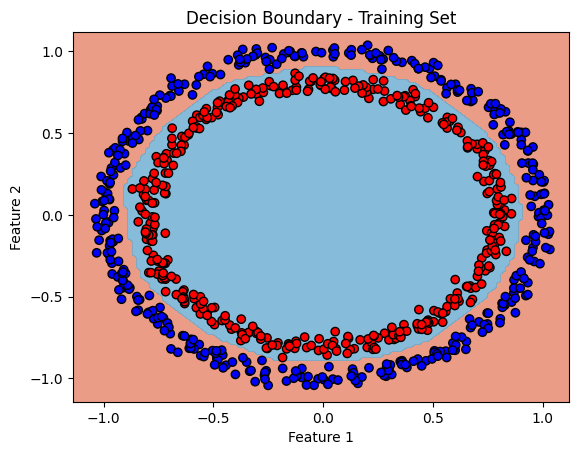

403/403 [==============================] - 1s 2ms/step


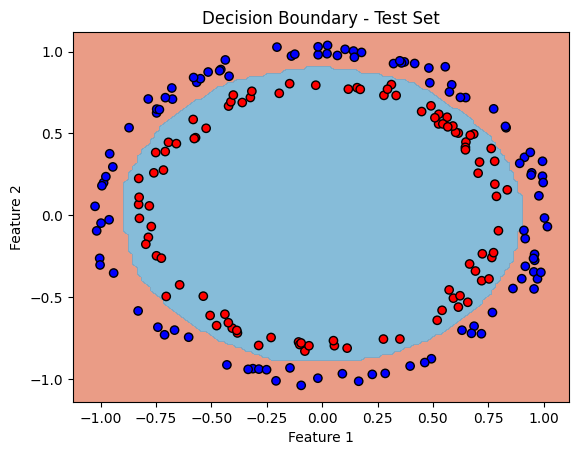

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Entraîner le modèle

from matplotlib.colors import ListedColormap

# Fonction pour tracer les frontières de décision
def plot_decision_boundary(model, X, y, title):
    h = .02  # pas dans la grille
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Tracer les frontières de décision pour les ensembles d'entraînement et de test
plot_decision_boundary(model, X_train, y_train, title='Decision Boundary - Training Set')

# Tracer les frontières de décision pour l'ensemble de test
plot_decision_boundary(model, X_test, y_test, title='Decision Boundary - Test Set')


**La multi-Classification**

In [ ]:
from sklearn.datasets import make_blobs

# Créer des données multiclasse avec make_blobs()
X, y = make_blobs(n_samples=10000, n_features=2, centers=4, random_state=42)

# Afficher les dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)


Dimensions de l'entrée (X) : (10000, 2)
Dimensions de la sortie (y) : (10000,)


In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de l'ensemble d'apprentissage (X_train) :", X_train.shape)
print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)


Dimensions de l'ensemble d'apprentissage (X_train) : (8000, 2)
Dimensions de l'ensemble de test (X_test) : (2000, 2)


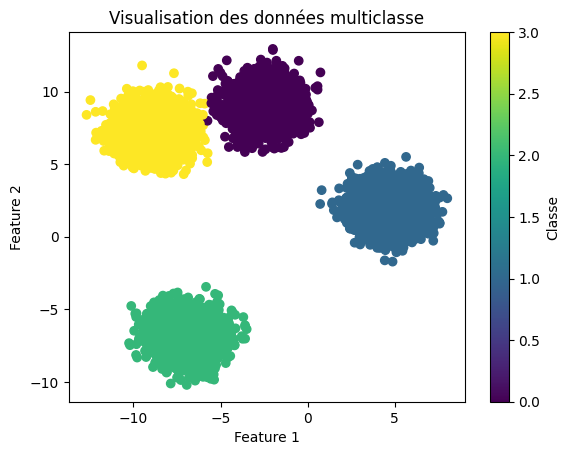

In [ ]:
import matplotlib.pyplot as plt

# Tracer les points pour chaque classe
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des données multiclasse')
plt.colorbar(label='Classe')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create FCNN model
model = Sequential()

# Add input layer
#model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2404 (9.39 KB)
Trainable params: 2404 (9.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)




In [ ]:

for i in range(0, 50, 10):
      print("Epoch", i+1, ":")
      train_loss = history.history['loss'][i]
      train_accuracy = history.history['accuracy'][i]
      test_loss = history.history['val_loss'][i]
      test_accuracy = history.history['val_accuracy'][i]

      print("  Train Loss:", train_loss)
      print("  Train Accuracy:", train_accuracy)
      print("  Test Loss:", test_loss)
      print("  Test Accuracy:", test_accuracy)

Epoch 1 :
  Train Loss: 0.0006866802577860653
  Train Accuracy: 0.999750018119812
  Test Loss: 0.0019146532285958529
  Test Accuracy: 0.9990000128746033
Epoch 11 :
  Train Loss: 0.0009142355993390083
  Train Accuracy: 0.999625027179718
  Test Loss: 0.00043923582416027784
  Test Accuracy: 1.0
Epoch 21 :
  Train Loss: 0.0006547457305714488
  Train Accuracy: 0.999750018119812
  Test Loss: 0.000646302942186594
  Test Accuracy: 1.0
Epoch 31 :
  Train Loss: 0.0010117581114172935
  Train Accuracy: 0.999625027179718
  Test Loss: 0.0007044891244731843
  Test Accuracy: 1.0
Epoch 41 :
  Train Loss: 0.0004920921637676656
  Train Accuracy: 0.999750018119812
  Test Loss: 0.0013695132220163941
  Test Accuracy: 0.9990000128746033


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Faire des prédictions sur l'ensemble de test
y_pred_prob = model.predict(X_test)
# Convertir les probabilités en classes prédites en choisissant la classe avec la probabilité maximale
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


63/63 [==============================] - 0s 769us/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[500   0   0   0]
 [  0 509   0   0]
 [  0   0 475   0]
 [  0   0   0 516]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       509
           2       1.00      1.00      1.00       475
           3       1.00      1.00      1.00       516

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



40827/40827 [==============================] - 34s 820us/step


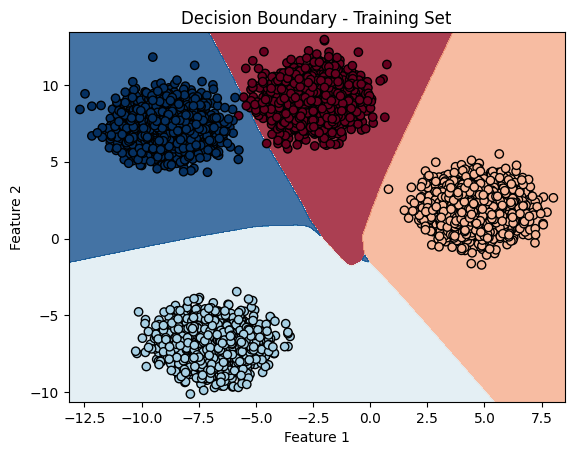

37368/37368 [==============================] - 31s 835us/step


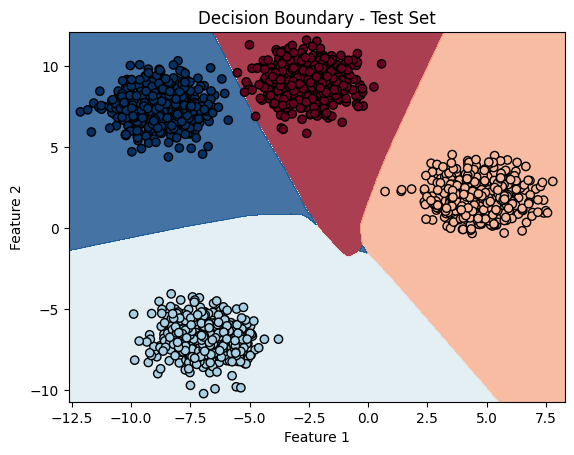

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()


# Plot decision boundary for training set
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary - Training Set')

# Plot decision boundary for test set
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary - Test Set')


Dimensions de l'entrée (X) : (500, 2)
Dimensions de la sortie (y) : (500,)
Dimensions de l'ensemble d'apprentissage (X_train) : (400, 2)
Dimensions de l'ensemble de test (X_test) : (100, 2)


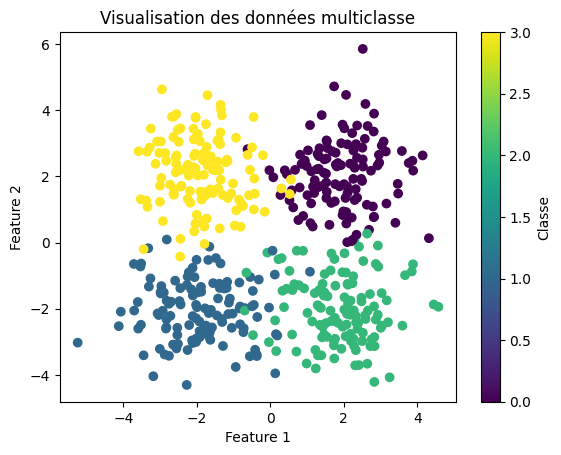

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 4)                 132       
                                                                 
Total params: 10852 (42.39 KB)
Trainable params: 10852 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1 :
  Train Loss: 1.173203706741333
  Train Accuracy: 0.6449999809265137
  Test Loss: 0.9268441796302795
  Test Accuracy: 0.699999988079071
Epoc

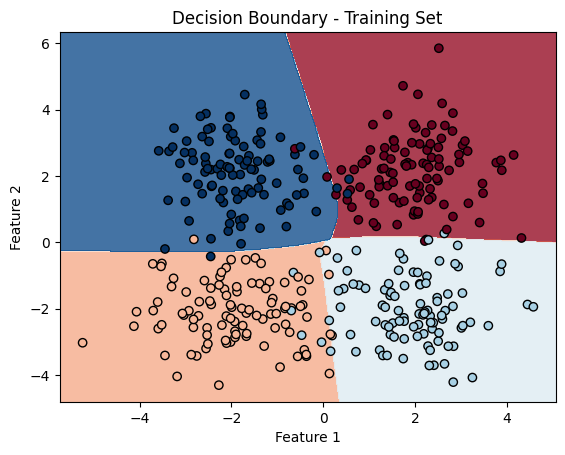

6048/6048 [==============================] - 5s 901us/step


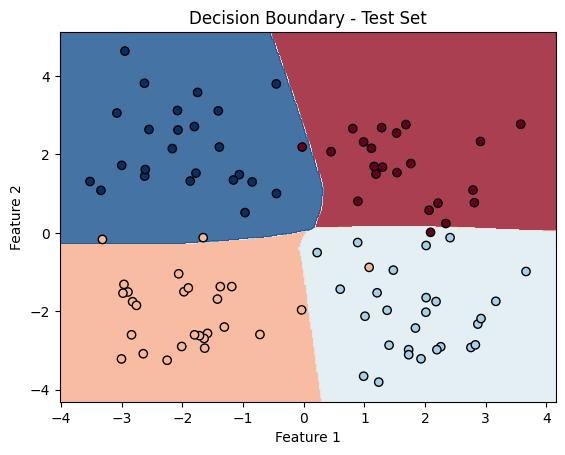

Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)
Dimensions de l'ensemble d'apprentissage (X_train) : (800, 2)
Dimensions de l'ensemble de test (X_test) : (200, 2)


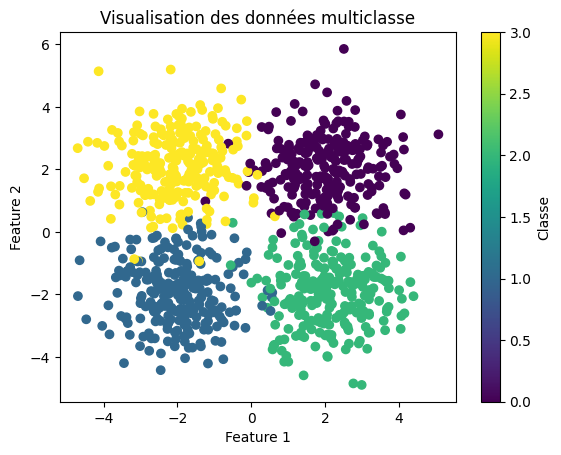

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               384       
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 4)                 132       
                                                                 
Total params: 10852 (42.39 KB)
Trainable params: 10852 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1 :
  Train Loss: 0.9245963096618652
  Train Accuracy: 0.8299999833106995
  Test Loss: 0.5621652603149414
  Test Accuracy: 0.949999988079071
Epo

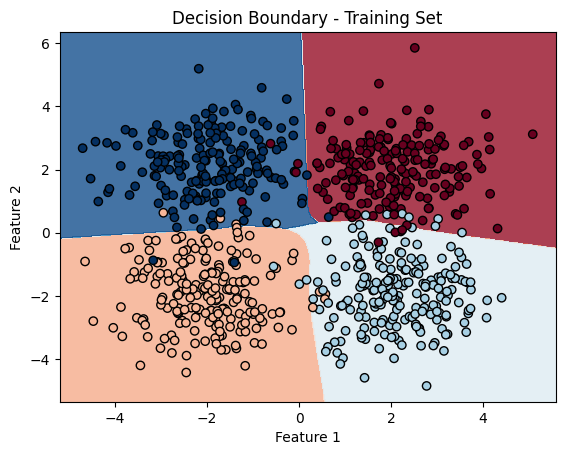

8643/8643 [==============================] - 8s 916us/step


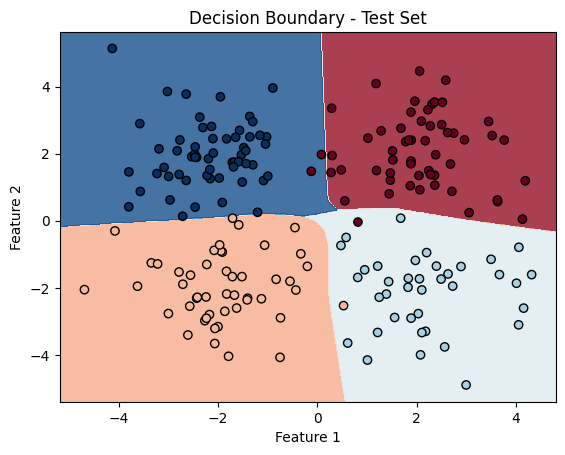

Dimensions de l'entrée (X) : (5000, 2)
Dimensions de la sortie (y) : (5000,)
Dimensions de l'ensemble d'apprentissage (X_train) : (4000, 2)
Dimensions de l'ensemble de test (X_test) : (1000, 2)


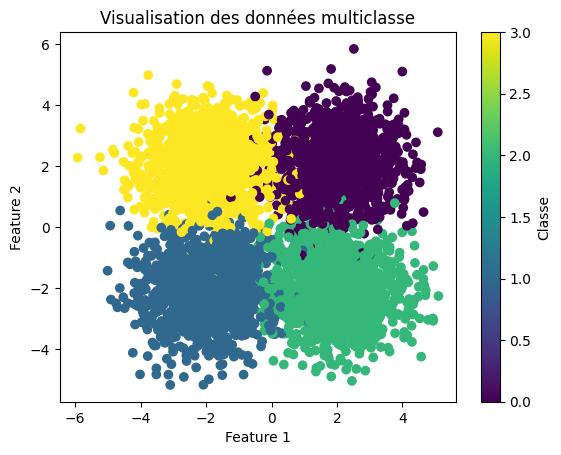

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               384       
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 4)                 132       
                                                                 
Total params: 10852 (42.39 KB)
Trainable params: 10852 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1 :
  Train Loss: 0.30616772174835205
  Train Accuracy: 0.9302499890327454
  Test Loss: 0.16058355569839478
  Test Accuracy: 0.949999988079071
E

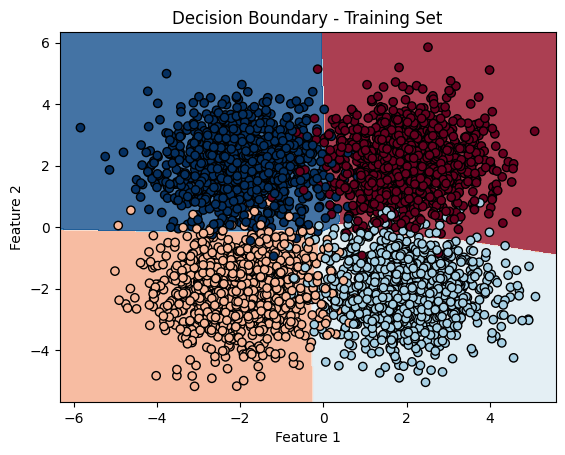

9766/9766 [==============================] - 9s 914us/step


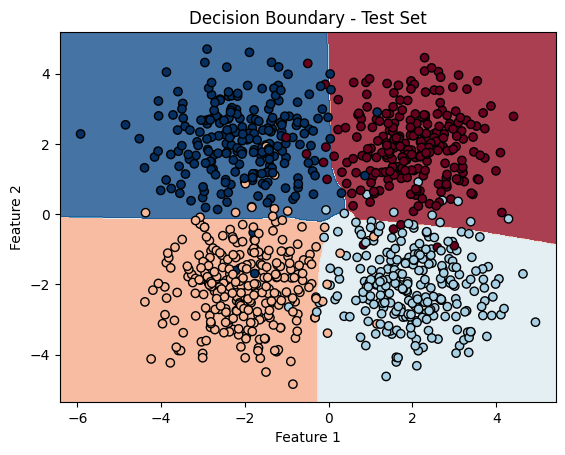

Dimensions de l'entrée (X) : (10000, 2)
Dimensions de la sortie (y) : (10000,)
Dimensions de l'ensemble d'apprentissage (X_train) : (8000, 2)
Dimensions de l'ensemble de test (X_test) : (2000, 2)


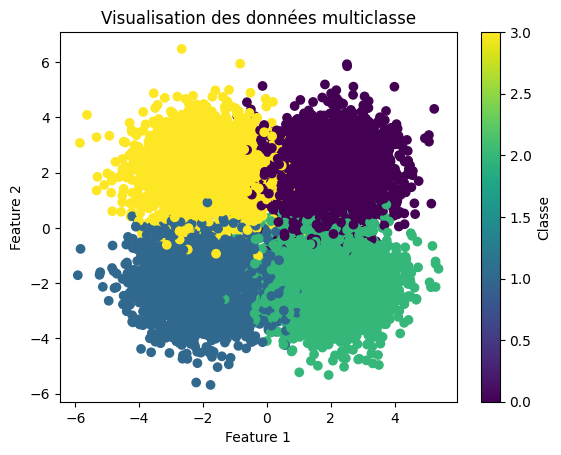

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               384       
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 4)                 132       
                                                                 
Total params: 10852 (42.39 KB)
Trainable params: 10852 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1 :
  Train Loss: 0.22120317816734314
  Train Accuracy: 0.9430000185966492
  Test Loss: 0.12776830792427063
  Test Accuracy: 0.9520000219345093


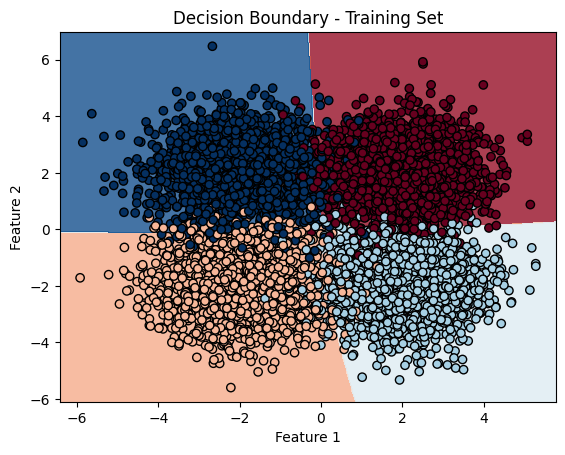

12068/12068 [==============================] - 12s 1ms/step


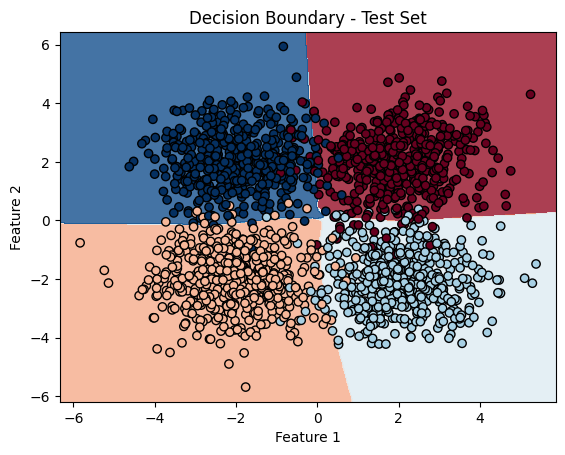

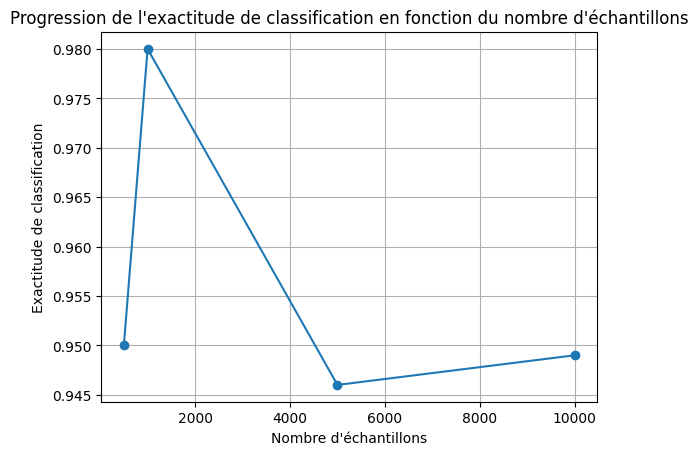

In [ ]:
from sklearn.datasets import make_blobs
n_samples=[500,1000,5000,10000]
accuracies = []
# Créer des données avec des centres plus proches
for n_sample in n_samples:
  X, y = make_blobs(n_samples=n_sample, n_features=2, centers=[[2, 2], [-2, -2], [2, -2], [-2, 2]], random_state=42)
  print("Dimensions de l'entrée (X) :", X.shape)
  print("Dimensions de la sortie (y) :", y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'apprentissage et de test
  print("Dimensions de l'ensemble d'apprentissage (X_train) :", X_train.shape)
  print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)
  # Tracer les points pour chaque classe
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Visualisation des données multiclasse')
  plt.colorbar(label='Classe')
  plt.show()
  model = Sequential()

# Add input layer
  model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))

# Add output layer
  model.add(Dense(4, activation='softmax'))

# Compile the model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
  model.summary()
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Display progress every 10 epochs
  for i in range(0, 100, 10):
        print("Epoch", i+1, ":")
        train_loss = history.history['loss'][i]
        train_accuracy = history.history['accuracy'][i]
        test_loss = history.history['val_loss'][i]
        test_accuracy = history.history['val_accuracy'][i]

        print("  Train Loss:", train_loss)
        print("  Train Accuracy:", train_accuracy)
        print("  Test Loss:", test_loss)
        print("  Test Accuracy:", test_accuracy)
  # Faire des prédictions sur l'ensemble de test
  y_pred_prob = model.predict(X_test)
  # Convertir les probabilités en classes prédites en choisissant la classe avec la probabilité maximale
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calculer les métriques
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)

  # Afficher les métriques
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("Confusion Matrix:\n", conf_matrix)
  print("Classification Report:\n", class_report)
  _, accuracy = model.evaluate(X_test, y_test, verbose=0)
  accuracies.append(accuracy)

# Tracer la courbe de progression de l'exactitude de classification en fonction du nombre d'échantillons

  plot_decision_boundary(X_train, y_train, model, title='Decision Boundary - Training Set')

  # Plot decision boundary for test set
  plot_decision_boundary(X_test, y_test, model, title='Decision Boundary - Test Set')
plt.plot(n_samples, accuracies, marker='o')
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Exactitude de classification')
plt.title('Progression de l\'exactitude de classification en fonction du nombre d\'échantillons')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de l'ensemble d'apprentissage (X_train) :", X_train.shape)
print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)


Dimensions de l'ensemble d'apprentissage (X_train) : (8000, 2)
Dimensions de l'ensemble de test (X_test) : (2000, 2)


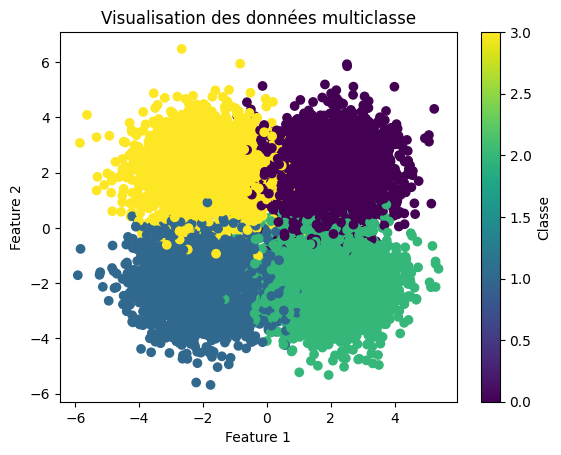

In [ ]:
import matplotlib.pyplot as plt

# Tracer les points pour chaque classe
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des données multiclasse')
plt.colorbar(label='Classe')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create FCNN model
model = Sequential()

# Add input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               384       
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 4)                 132       
                                                                 
Total params: 10852 (42.39 KB)
Trainable params: 10852 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Display progress every 10 epochs
for i in range(0, 100, 10):
    loss_train, acc_train = model.evaluate(X_train, y_train, verbose=0)
    loss_test, acc_test = model.evaluate(X_test, y_test, verbose=0)
    print(f"Epoch {i+1}:")
    print(f"  Training - Loss: {loss_train:.4f}, Accuracy: {acc_train:.4f}")
    print(f"  Test - Loss: {loss_test:.4f}, Accuracy: {acc_test:.4f}")

Epoch 1:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 11:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 21:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 31:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 41:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 51:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 61:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 71:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 81:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500
Epoch 91:
  Training - Loss: 0.1176, Accuracy: 0.9550
  Test - Loss: 0.1307, Accuracy: 0.9500


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Faire des prédictions sur l'ensemble de test
y_pred_prob = model.predict(X_test)
# Convertir les probabilités en classes prédites en choisissant la classe avec la probabilité maximale
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

63/63 [==============================] - 0s 799us/step
Accuracy: 0.95
Precision: 0.9500095279009124
Recall: 0.95
F1 Score: 0.9500033082096744
Confusion Matrix:
 [[479   1  17  11]
 [  0 467  12   9]
 [ 14  14 487   0]
 [ 15   7   0 467]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       508
           1       0.96      0.96      0.96       488
           2       0.94      0.95      0.94       515
           3       0.96      0.96      0.96       489

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



12507/12507 [==============================] - 10s 809us/step


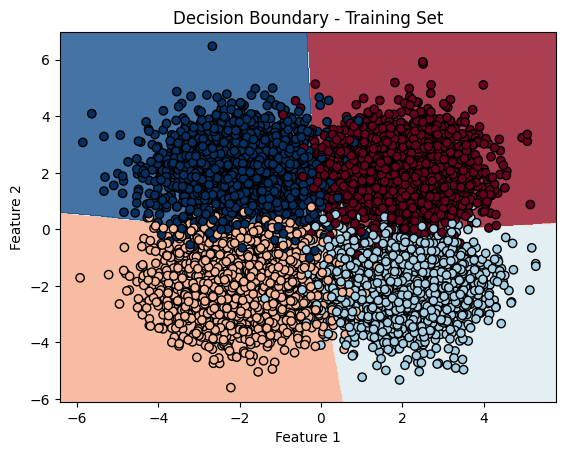

12068/12068 [==============================] - 11s 877us/step


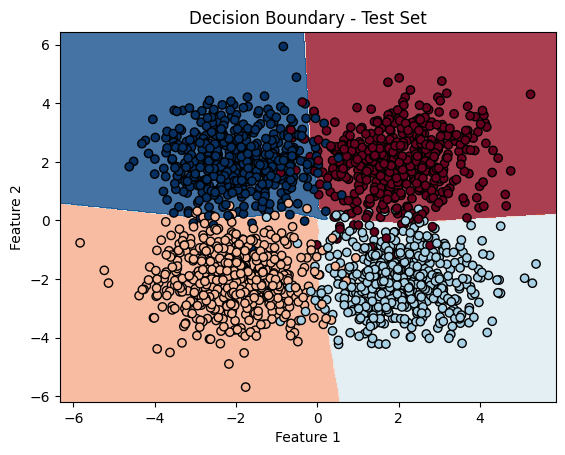

In [ ]:


# Plot decision boundary for training set
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary - Training Set')

# Plot decision boundary for test set
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary - Test Set')
